In [188]:
# Mapping Classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

In [189]:
# point comet_ml SDK to 161.92.208.196 installation
import os
os.environ["COMET_URL_OVERRIDE"] = "http://161.92.208.196/clientlib/"

# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    auto_metric_logging=True,
    auto_param_logging=True,
    auto_histogram_weight_logging=True,
    auto_histogram_gradient_logging=True,
    auto_histogram_activation_logging=True,
    api_key="x82uzJjUBAwzczXdXnKPxN22O",
    project_name="demo-project-3",
    workspace="ashishpal",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml http://161.92.208.196/ashishpal/demo-project-3/a1ce5aa1d3c54a119fe9982dc357d1db



In [190]:
# point comet_ml SDK to 161.92.208.196 installation
import os
os.environ["COMET_URL_OVERRIDE"] = "http://161.92.208.196/clientlib/"

# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    auto_metric_logging=True,
    auto_param_logging=True,
    auto_histogram_weight_logging=True,
    auto_histogram_gradient_logging=True,
    auto_histogram_activation_logging=True,
    api_key="xxxxxxxxxxxxxxxx",
    project_name="demo-project-2",
    workspace="ashishpal",
)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : http://161.92.208.196/ashishpal/demo-project-3/a1ce5aa1d3c54a119fe9982dc357d1db
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml http://161.92.208.196/ashishpal/demo-project-2/d18ef948c0e64a278ca5618d8ca81e90



In [192]:
import tensorflow as tf
import keras

In [193]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [194]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [195]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [196]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [197]:
import numpy as np
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [198]:
# Deine Model
model3 = Sequential()

# 1st Conv Layer
model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model3.add(Activation('relu'))

# 2nd Conv Layer
model3.add(Convolution2D(32, 3, 3))
model3.add(Activation('relu'))

# Max Pooling
model3.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model3.add(Dropout(0.2))

# Fully Connected Layer
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))

# More Dropout
model3.add(Dropout(0.2))

# Prediction Layer
model3.add(Dense(10))
model3.add(Activation('softmax'))

# Loss and Optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [199]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 9, 9, 32)          320       
_________________________________________________________________
activation_44 (Activation)   (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
activation_45 (Activation)   (None, 3, 3, 32)          0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 32)              

In [200]:
import os
#os.mkdir("my_logs")
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5")
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
# Store Training Results
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [tensorboard_cb,checkpoint_cb,early_stopping]

In [201]:
history = model3.fit(x_train, y_train, batch_size=32, epochs=10, 
          validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9374 - accuracy: 0.6562 - val_loss: 0.6514 - val_accuracy: 0.7593
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6887 - accuracy: 0.7500 - val_loss: 0.5818 - val_accuracy: 0.7832
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6287 - accuracy: 0.7693 - val_loss: 0.5529 - val_accuracy: 0.7897
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5990 - accuracy: 0.7800 - val_loss: 0.5271 - val_accuracy: 0.8063
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5763 - accuracy: 0.7886 - val_loss: 0.5167 - val_accuracy: 0.8070
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5594 - accuracy: 0.7935 - val_loss: 0.5101 - val_accuracy: 0.8063
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5486 - accuracy: 0.7985 - val_loss: 0.4998 - val_accuracy:

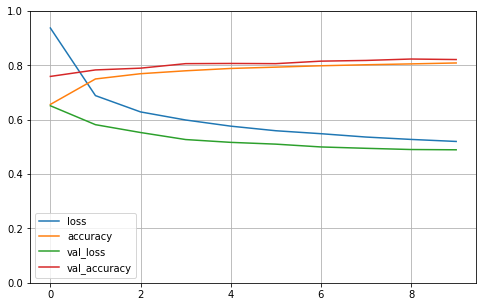

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [204]:
#will log metrics with the prefix 'test_'
with experiment.test():
    test_loss, test_accuracy = model3.evaluate(x_test, y_test)
    train_loss, train_accuracy = model3.evaluate(x_train, y_train)
    metrics = {
        'train_loss':train_loss,
        'train_accuracy':train_accuracy,
        'test_loss':test_loss,
        'test_accuracy':test_accuracy,
    }
    experiment.log_metrics(metrics)

experiment.log_dataset_hash(x_train) 

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4365 - accuracy: 0.8374


In [205]:
experiment.log_model("FASHION MNIST TF1", "my_keras_model.h5")

{'web': 'http://161.92.208.196/api/asset/download?assetId=0a13b6d6161f4725954ccbcb66443af1&experimentKey=d18ef948c0e64a278ca5618d8ca81e90',
 'api': 'http://161.92.208.196/api/rest/v2/experiment/asset/get-asset?assetId=0a13b6d6161f4725954ccbcb66443af1&experimentKey=d18ef948c0e64a278ca5618d8ca81e90',
 'assetId': '0a13b6d6161f4725954ccbcb66443af1'}

In [206]:
Y_pred = model3.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

In [207]:
Y_true = np.argmax(y_test,axis = 1) 

In [208]:
def index_to_example(index):
    image_array = x_test[index]
    image_name = "confusion-matrix-%05d.png" % index
    results = experiment.log_image(
        image_array, name=image_name, image_shape=(28, 28, 1)
    )
    # Return sample, assetId (index is added automatically)
    return {"sample": image_name, "assetId": results["imageId"]}

In [209]:
experiment.log_confusion_matrix(Y_true, Y_pred_classes , 
                labels = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'],
                index_to_example_function=index_to_example) 

{'web': 'http://161.92.208.196/api/asset/download?assetId=df16bf94ce054cae88da6640f0f0d1e3&experimentKey=d18ef948c0e64a278ca5618d8ca81e90',
 'api': 'http://161.92.208.196/api/rest/v2/experiment/asset/get-asset?assetId=df16bf94ce054cae88da6640f0f0d1e3&experimentKey=d18ef948c0e64a278ca5618d8ca81e90',
 'assetId': 'df16bf94ce054cae88da6640f0f0d1e3'}

In [168]:
correct = []
for i in range(len(y_test)):
    if(Y_pred_classes[i] == Y_true[i]):
        correct.append(i)
    if(len(correct) == 4):
        break

{'web': 'http://161.92.208.196/api/image/download?imageId=1bd72893388646298500bb0a1c0cbd70&experimentKey=6080714a066e4a2482b3311580880b7a',
 'api': 'http://161.92.208.196/api/rest/v1/image/get-image?imageId=1bd72893388646298500bb0a1c0cbd70&experimentKey=6080714a066e4a2482b3311580880b7a',
 'imageId': '1bd72893388646298500bb0a1c0cbd70'}

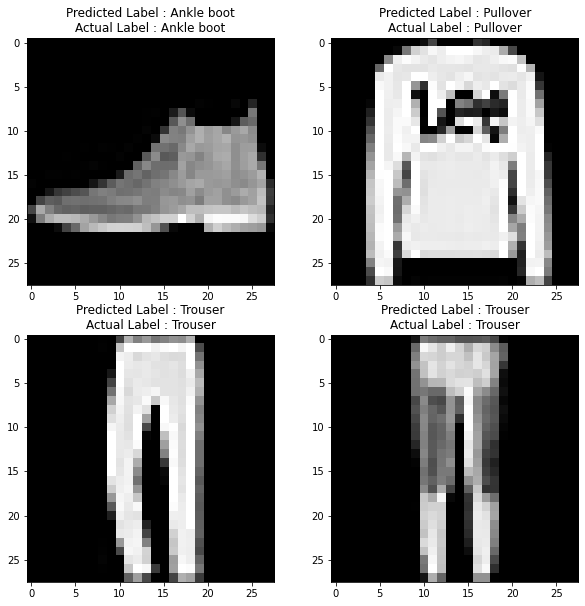

In [169]:
fig, ax = plt.subplots(2,2, figsize=(12,6))

fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[correct[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[correct[0]]]))
ax[0,1].imshow(x_test[correct[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[correct[1]]]))
ax[1,0].imshow(x_test[correct[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[correct[2]]]))
ax[1,1].imshow(x_test[correct[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[correct[3]]]))
experiment.log_figure(figure_name = "Correctly Predicted Classes" ,figure =  fig)

In [170]:
incorrect = []
for i in range(len(y_test)):
    if(not Y_pred_classes[i] == Y_true[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break

{'web': 'http://161.92.208.196/api/image/download?imageId=3af4f21a88da4b48aa38f40dcfa50e56&experimentKey=6080714a066e4a2482b3311580880b7a',
 'api': 'http://161.92.208.196/api/rest/v1/image/get-image?imageId=3af4f21a88da4b48aa38f40dcfa50e56&experimentKey=6080714a066e4a2482b3311580880b7a',
 'imageId': '3af4f21a88da4b48aa38f40dcfa50e56'}

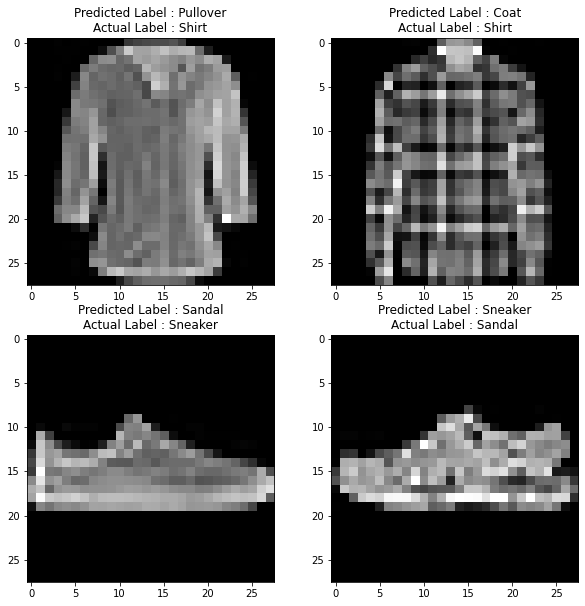

In [171]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[incorrect[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[0]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[incorrect[0]]]))
ax[0,1].imshow(x_test[incorrect[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[1]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[incorrect[1]]]))
ax[1,0].imshow(x_test[incorrect[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[2]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[incorrect[2]]]))
ax[1,1].imshow(x_test[incorrect[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[3]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[incorrect[3]]]))
experiment.log_figure(figure_name = "Incorrectly Predicted Classes", figure = fig)

In [210]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : http://161.92.208.196/ashishpal/demo-project-2/d18ef948c0e64a278ca5618d8ca81e90
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy [10]                 : (0.6562166810035706, 0.80881667137146)
COMET INFO:     batch_accuracy [1880]         : (0.12215909361839294, 0.875)
COMET INFO:     batch_loss [1880]             : (0.3420148193836212, 2.2976584434509277)
COMET INFO:     epoch_duration [10]           : (3.5957936299964786, 5.226625642011641)
COMET INFO:     loss [10]                     : (0.5200531482696533, 0.9373955130577087)
COMET INFO:     test_test_accuracy            : 0.821399986743927
COMET INFO:     test_test_loss                : 0.48935848474502563
COMET INFO:     test_train_accuracy           : 0.8373833298683167
COMET INFO:     test_trai